##Loading Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [4]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


###EDA

In [5]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
diabetes_df.shape

(768, 9)

In [7]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##Preprocessing(Handling null values)

In [11]:
diabetes_df.isnull().head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [10]:
diabetes_df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [12]:
diabetes_df_copy = diabetes_df.copy(deep=True)
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


##Graphs for visualization

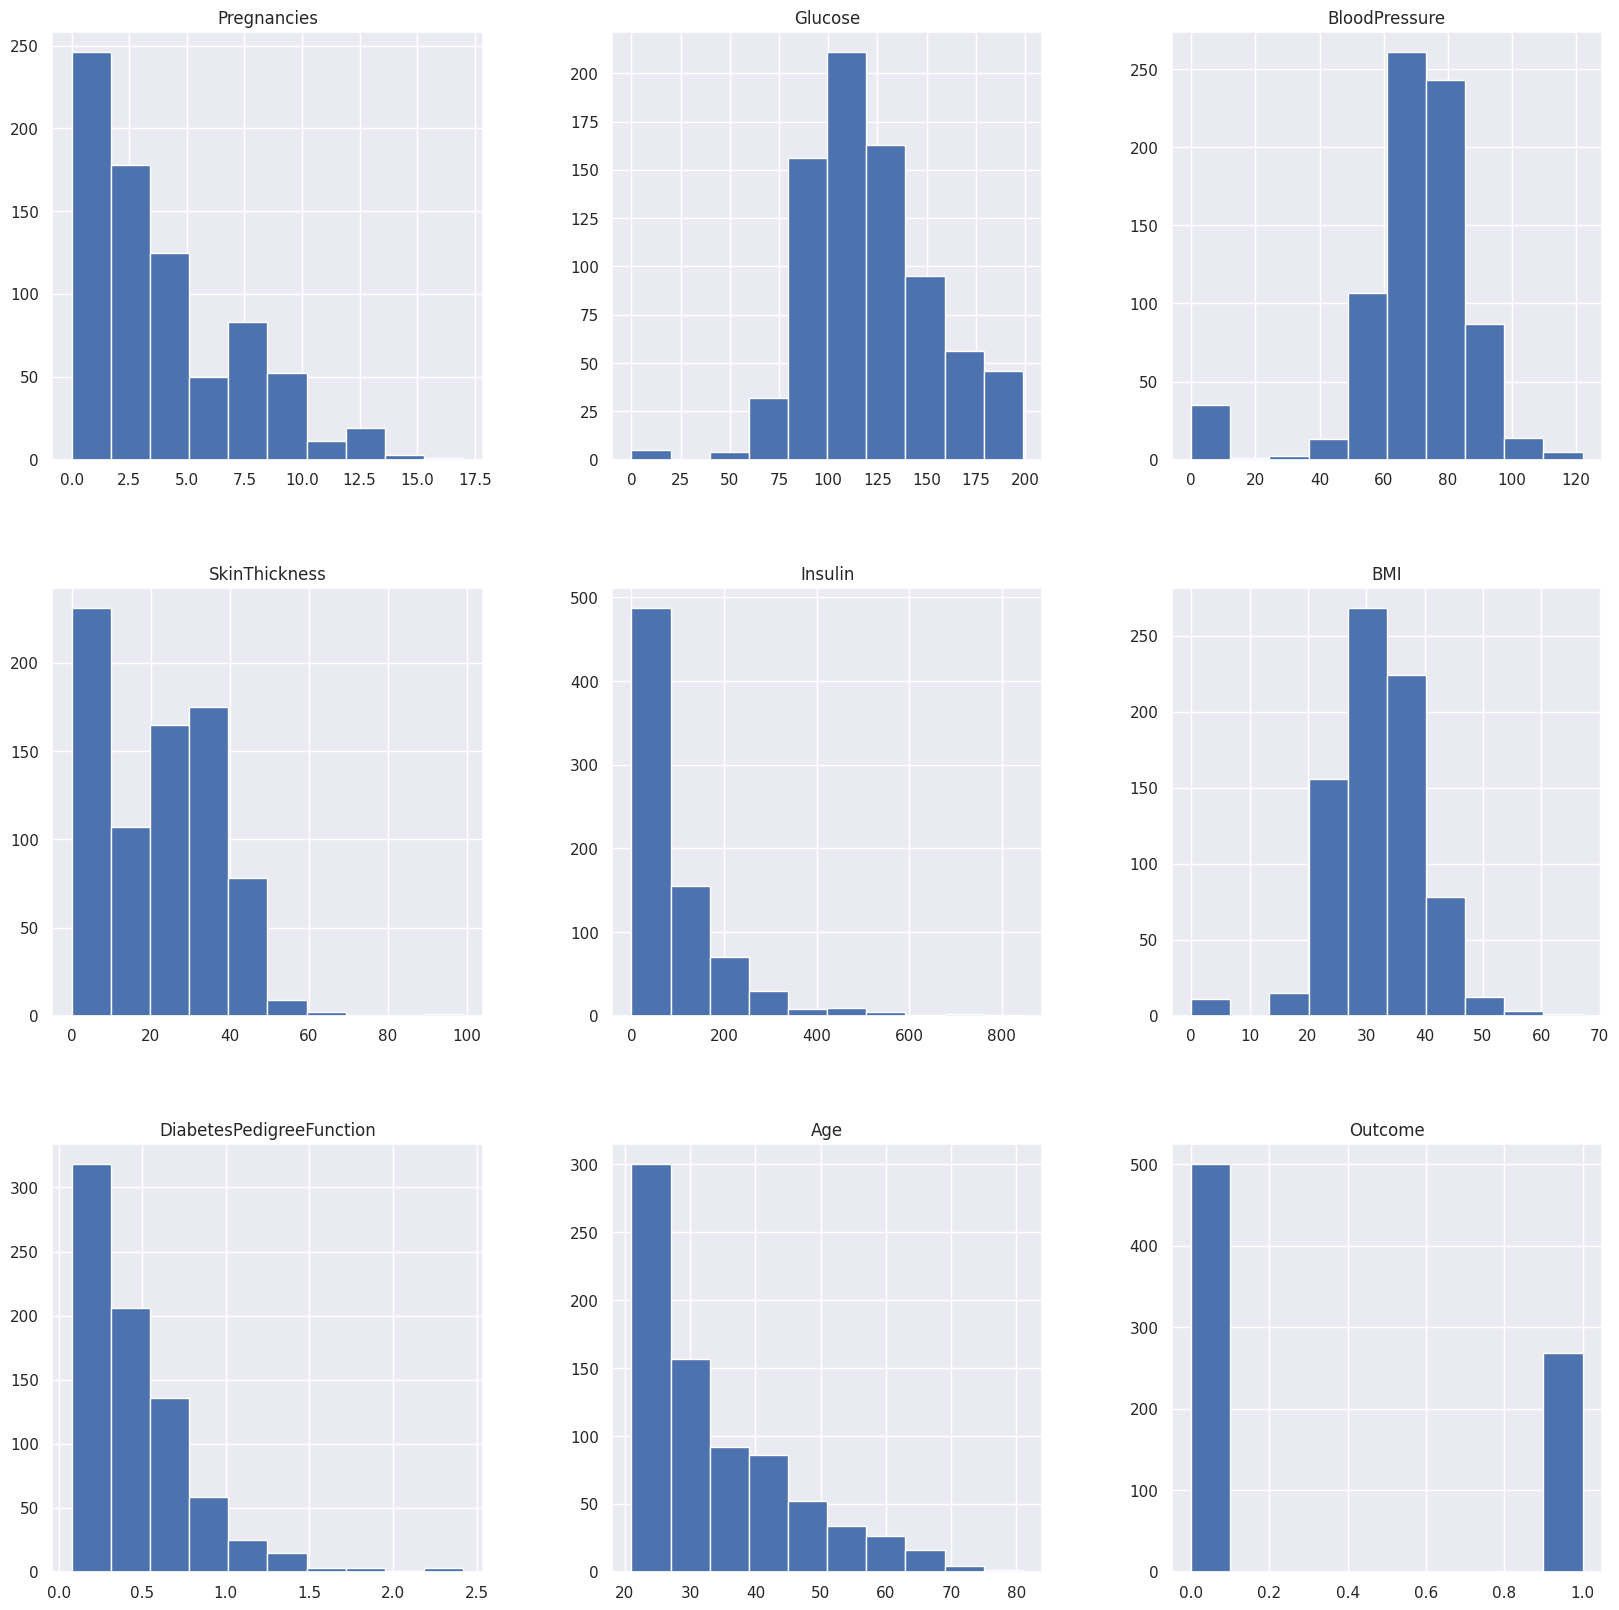

In [13]:
pt = diabetes_df.hist(figsize=(20, 20))

<ipython-input-18-57f513f1d0fc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_df['Insulin'])


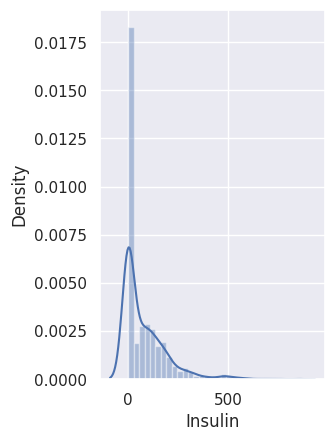

In [18]:
plt.subplot(121)
sns.distplot(diabetes_df['Insulin'])
plt.show()

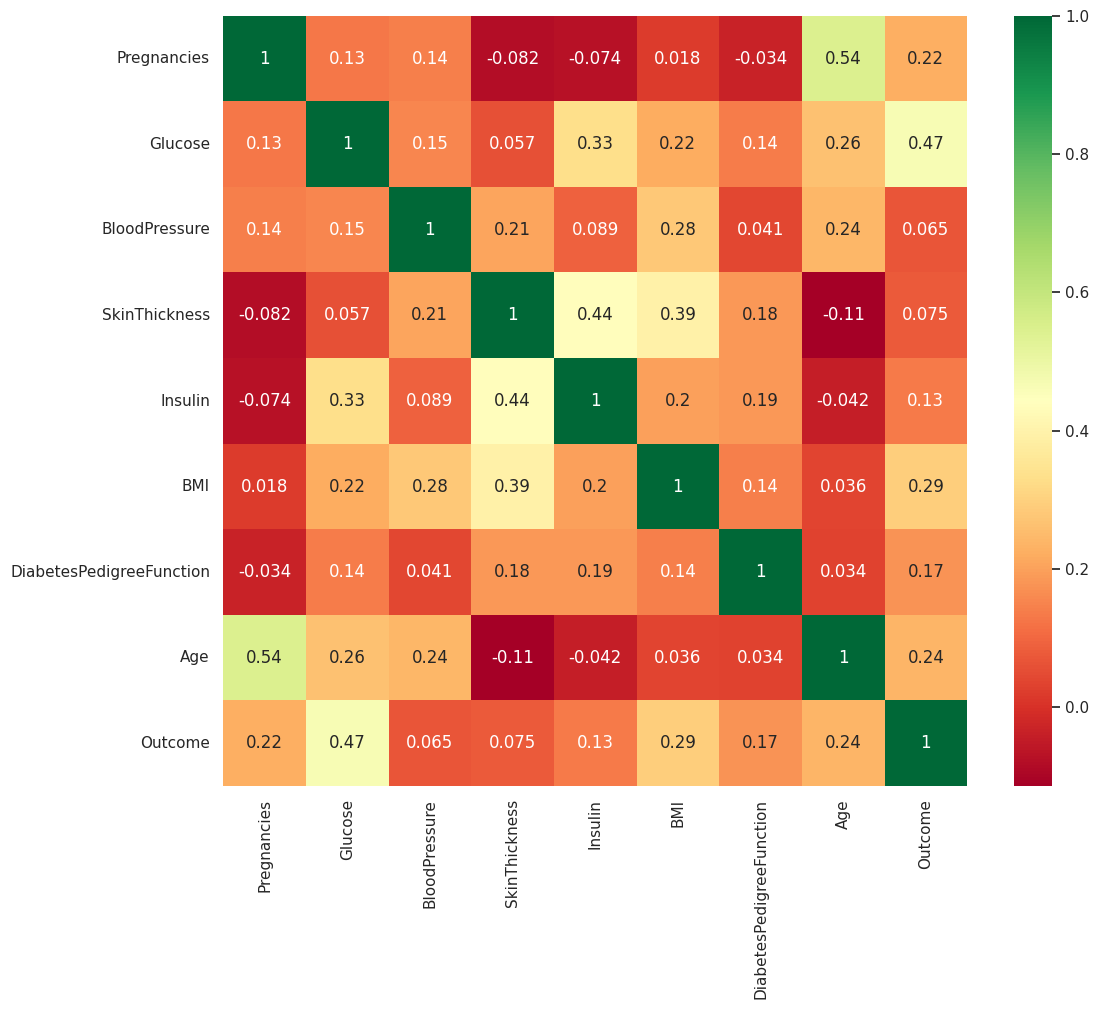

In [23]:
plt.figure(figsize=(12, 10))
p = sns.heatmap(diabetes_df.corr(), annot=True, cmap='RdYlGn')

##Model building

In [24]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

In [36]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

logits = dtree.predict_proba(X_test)
def softmax(x):
    e_x = np.exp(x - np.max(x))

activated_output = softmax(logits)
print(activated_output)

[[0.21194156 0.57611688 0.21194156]
 [0.57611688 0.21194156 0.21194156]
 [0.21194156 0.21194156 0.57611688]
 [0.21194156 0.57611688 0.21194156]
 [0.21194156 0.57611688 0.21194156]
 [0.57611688 0.21194156 0.21194156]
 [0.21194156 0.57611688 0.21194156]
 [0.21194156 0.21194156 0.57611688]
 [0.21194156 0.57611688 0.21194156]
 [0.21194156 0.57611688 0.21194156]
 [0.21194156 0.21194156 0.57611688]
 [0.57611688 0.21194156 0.21194156]
 [0.57611688 0.21194156 0.21194156]
 [0.57611688 0.21194156 0.21194156]
 [0.57611688 0.21194156 0.21194156]
 [0.21194156 0.57611688 0.21194156]
 [0.21194156 0.21194156 0.57611688]
 [0.21194156 0.57611688 0.21194156]
 [0.21194156 0.57611688 0.21194156]
 [0.21194156 0.21194156 0.57611688]
 [0.57611688 0.21194156 0.21194156]
 [0.21194156 0.21194156 0.57611688]
 [0.57611688 0.21194156 0.21194156]
 [0.21194156 0.21194156 0.57611688]
 [0.21194156 0.21194156 0.57611688]
 [0.21194156 0.21194156 0.57611688]
 [0.21194156 0.21194156 0.57611688]
 [0.21194156 0.21194156 0.57

##Accuracy metrics

In [42]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)


model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

print("Accuracy:", accuracy)
print("F1-score:", f1)
print("ROC-AUC score:", roc_auc)

Accuracy: 0.94
F1-score: 0.939953667953668
ROC-AUC score: 0.9565972222222222
